In [1]:
# Initialisation

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

from keras.utils import to_categorical

%matplotlib inline

In [3]:
# Set helper values

In [4]:
num_classes = 10
batch_size = 128
epochs = 24
input_shape = (28, 28, 1)  # explicitly set the shape as a 28x28px with a single channel

In [5]:
# Load and massage data

In [6]:
def prepare_X_data(dataset):
    dataset = dataset.reshape(dataset.shape[0], *input_shape)  # explcitly set the shape
    dataset = dataset.astype('float32')
    dataset = dataset / 255  # renormalize intensity to 0-1
    
    return dataset

def prepare_y_data(dataset):
    dataset = to_categorical(dataset, num_classes)  # one-hot encoding, ensure categorical data is not treated as N
    
    return dataset

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  # actually downloads about 30mb of data

x_train = prepare_X_data(x_train)
x_test = prepare_X_data(x_test)
y_train = prepare_y_data(y_train)
y_test = prepare_y_data(y_test)

In [9]:
# Model definition and training

In [10]:
model = Sequential()

# convolution+pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# dense layers
model.add(Flatten())  # transform to a feature vector for easier handling
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # dropout layer to prevent overfitting
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adadelta(),
    metrics=['accuracy']
)

In [11]:
# ~20s per layer on laptop cpu
train_history = model.fit(
    x_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=True,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 20s 330us/step - loss: 0.6540 - acc: 0.7605 - val_loss: 0.4305 - val_acc: 0.8392
Epoch 2/24
60000/60000 [==============================] - 20s 326us/step - loss: 0.4029 - acc: 0.8530 - val_loss: 0.3644 - val_acc: 0.8702
Epoch 3/24
60000/60000 [==============================] - 20s 326us/step - loss: 0.3523 - acc: 0.8709 - val_loss: 0.3309 - val_acc: 0.8786
Epoch 4/24
60000/60000 [==============================] - 20s 335us/step - loss: 0.3202 - acc: 0.8838 - val_loss: 0.3197 - val_acc: 0.8831
Epoch 5/24
60000/60000 [==============================] - 20s 340us/step - loss: 0.2972 - acc: 0.8901 - val_loss: 0.2995 - val_acc: 0.8919
Epoch 6/24
60000/60000 [==============================] - 21s 351us/step - loss: 0.2827 - acc: 0.8965 - val_loss: 0.2935 - val_acc: 0.8931
Epoch 7/24
60000/60000 [==============================] - 22s 360us/step - loss: 0.2669 - acc: 0.9020 - val_loss: 0.

In [12]:
# Scoring

[0.2614892368912697, 0.9134]


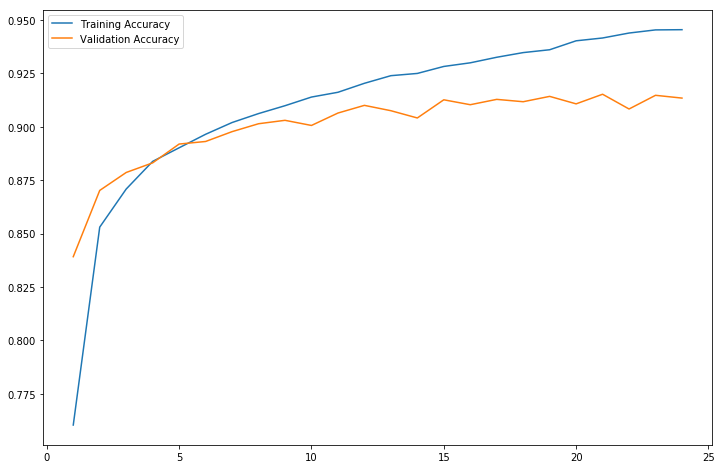

In [14]:
print(model.evaluate(x_test, y_test, verbose=0))

epoch_list = list(range(1, len(train_history.history['acc']) + 1))  # values
plt.figure(figsize=(12, 8))
plt.plot(epoch_list, train_history.history['acc'], epoch_list, train_history.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))

plt.show()